<a href="https://colab.research.google.com/github/bcdanl/210-code/blob/main/danl_proj_nba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
title: Data Analysis Project
subtitle: NBA
author: YOUR_NAME
date: 2024-02-15
from: markdown+emoji
---

# Data Loading and Preliminary Exploration

First, we loaded the NBA dataset and observed its structure. The dataset contains five columns: `Name`, `Team`, `Position`, `Birthday`, and `Salary`. This gives us a good starting point to explore various aspects of the data, such as salary distributions among teams, age distribution of players, and more.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from itables import init_notebook_mode
from itables import show

nba = pd.read_csv("https://bcdanl.github.io/data/nba_players.csv")
show(nba)

Let's start with checking out types of variables and missing values.

In [4]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 51 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PlayerName    467 non-null    object 
 1   Salary        467 non-null    int64  
 2   Position      467 non-null    object 
 3   Age           467 non-null    int64  
 4   Team          467 non-null    object 
 5   GP            467 non-null    int64  
 6   GS            467 non-null    int64  
 7   MP            467 non-null    float64
 8   FG            467 non-null    float64
 9   FGA           467 non-null    float64
 10  FG_pct        466 non-null    float64
 11  3P            467 non-null    float64
 12  3PA           467 non-null    float64
 13  3P_pct        454 non-null    float64
 14  2P            467 non-null    float64
 15  2PA           467 non-null    float64
 16  2P_pct        463 non-null    float64
 17  eFG_pct       466 non-null    float64
 18  FT            467 non-null    

# Data Cleaning

Our initial peek at the data reveals some potential areas for cleaning:
  - Handling missing values, especially in the Salary column.
  - Converting the Birthday column to a datetime format to facilitate age calculations.

# Descriptive Statistics
Let's take a look at the descriptive statistics.

In [5]:
nba_sum = nba.describe(include = "all")
show(nba_sum)

# Data Analysis with Visualization



## Salary Distribution Among Teams
Let's start with the salary distribution among teams using seaborn for visualization. ​​


In [6]:

# Handle missing values in 'Salary' by replacing them with the median salary
median_salary = nba['Salary'].median()
nba['Salary'].fillna(median_salary, inplace=True)


/var/folders/_m/d6jf0jhd2zzdfd5kzdhl_24w0000gn/T/ipykernel_79892/1671011424.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nba['Salary'].fillna(median_salary, inplace=True)


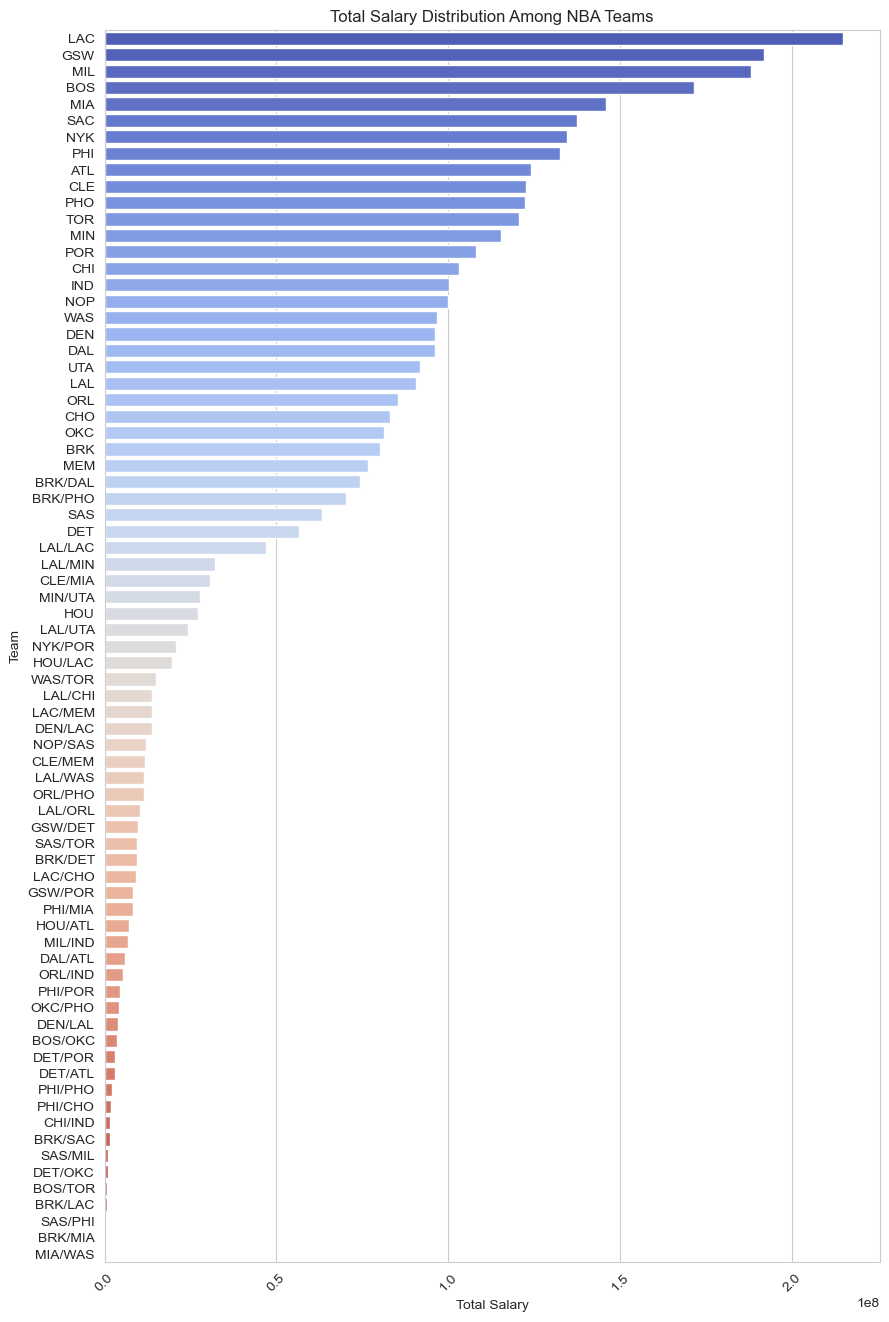

In [9]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Calculate total salary by team
team_salary = (
    nba
    .groupby('Team')['Salary']
    .sum()
    .reset_index()
    .sort_values(by='Salary', ascending=False)
)

# Plot total salary by team
plt.figure(figsize=(10, 16))
sns.barplot(data = team_salary,
            x = 'Salary', y = 'Team',
            palette = 'coolwarm')
plt.title('Total Salary Distribution Among NBA Teams')
plt.xlabel('Total Salary')
plt.ylabel('Team')
plt.xticks(rotation=45)
plt.show()


The visualization above displays the total salary distribution among NBA teams, with teams sorted by their total salary expenditure. This bar plot reveals which teams are the biggest spenders on player salaries and which are more conservative. The color gradient provides a visual cue to easily distinguish between the higher and lower spending teams.

Notice that Portland Trail Blazers has the highest total salary followed by Golden State Warriors and Philadelphia 76ers, and Memphis Grizzlies has the lowest total salary.


## Player Age Distribution

Next, let's explore the Player Age Distribution across the NBA. We'll create a histogram to visualize how player ages are distributed, which will help us understand if the league trends younger, older, or has a balanced age mix. ​​

/Users/bchoe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


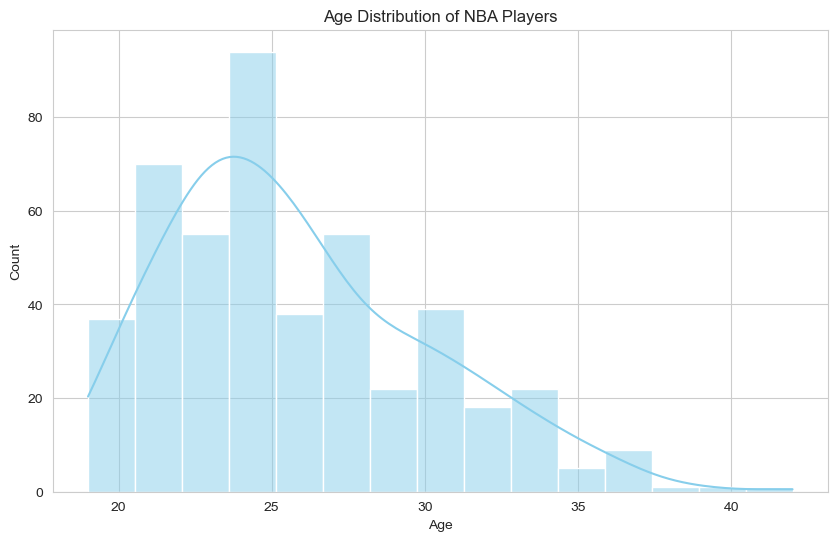

In [12]:
# Convert 'Birthday' column to datetime format
from dateutil import parser
# nba['Birthday'] = nba['Birthday'].apply(lambda x: parser.parse(x))

# Now, let's calculate the age of each player
# nba['Age'] = (datetime.now() - nba['Birthday']).dt.days // 365

# Plot the age distribution of NBA players
plt.figure(figsize=(10, 6))
sns.histplot(nba['Age'],
             bins = 15,
             kde = True,
             color = 'skyblue')
plt.title('Age Distribution of NBA Players')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()



The histogram above shows the age distribution of NBA players, with a kernel density estimate (KDE) overlay to indicate the distribution shape. The plot helps identify the common ages for NBA players and whether there are significant numbers of very young or older players.

Notice that the majority of players fall within an age range from 24 to 34. There are few players whose age is above 40.

## Position-wise Salary Insights


Moving on to Position-wise Salary Insights, we'll examine how average salaries differ across player positions. This analysis could reveal which positions are typically higher-paid, potentially reflecting their value on the basketball court. Let's create a box plot to visualize the salary distribution for each position. ​​


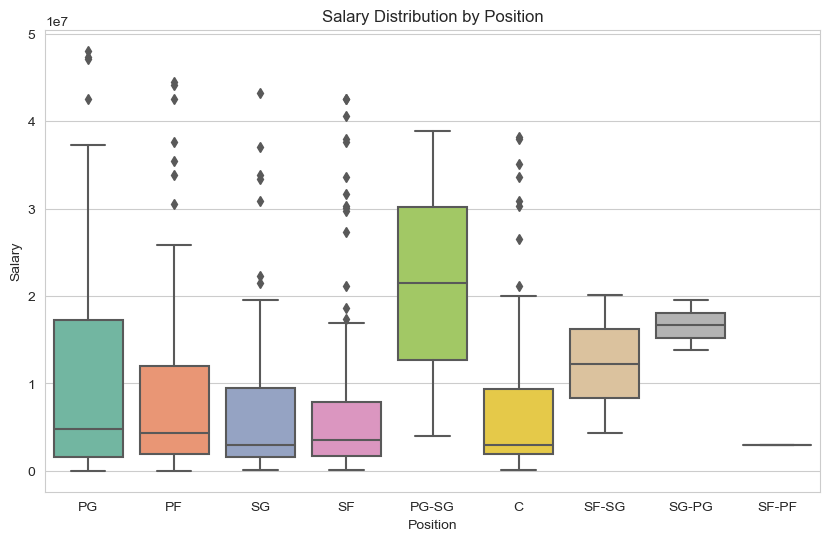

In [13]:
# Plot salary distribution by player position
plt.figure(figsize=(10, 6))
sns.boxplot(data = nba,
            x = 'Position', y = 'Salary',
            palette = 'Set2')
plt.title('Salary Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()


The box plot above illustrates the salary distribution by player position, showcasing the variation in salaries among different positions within the NBA. PG-SG has the highest median salary.



## Top 10 Highest Paid Players

Lastly, we'll identify the Top 10 Highest Paid Players in the NBA. Let's visualize this information.


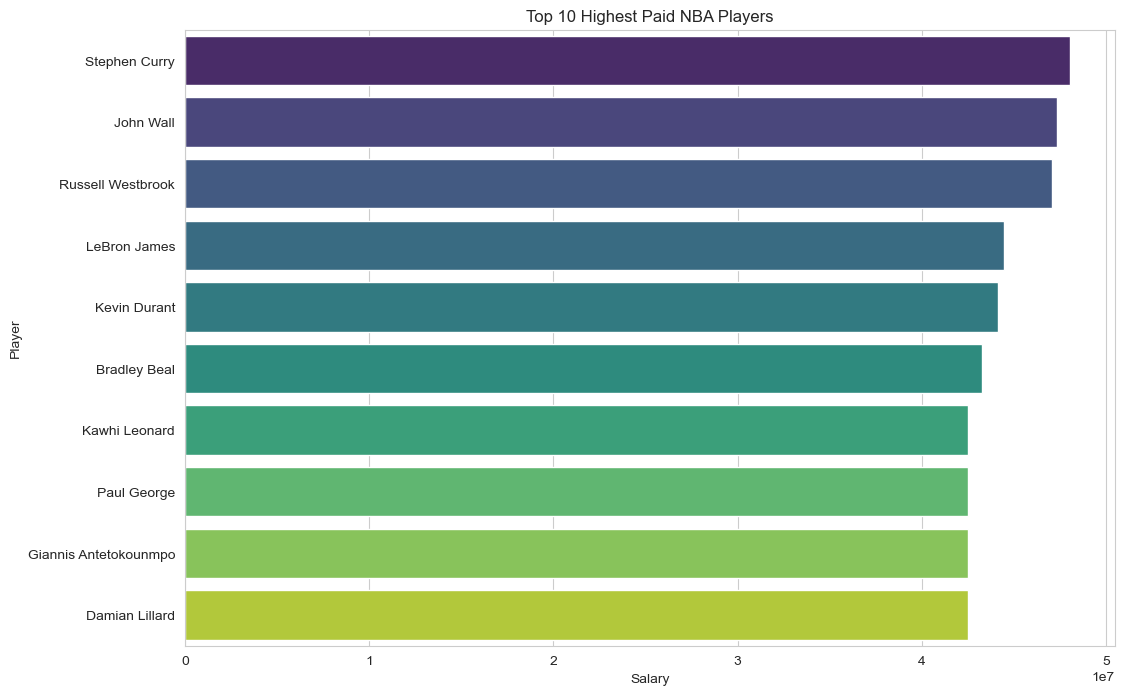

In [15]:
# Identify the top 10 highest paid players
top_10_salaries = nba.sort_values(by='Salary', ascending=False).head(10)

# Plot the top 10 highest paid players
plt.figure(figsize=(12, 8))
sns.barplot(data = top_10_salaries,
            x = 'Salary', y = 'PlayerName',
            palette = 'viridis')
plt.title('Top 10 Highest Paid NBA Players')
plt.xlabel('Salary')
plt.ylabel('Player')
plt.show()


The bar plot above reveals the top 10 highest-paid NBA players,  showcasing those who stand at the pinnacle of the league in terms of salary. This visualization not only highlights the star players who command the highest salaries but also may reflect their marketability, performance, and contribution to their respective teams.